In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salaries-2023/ds_salaries.csv


# Legend

experience_level:
* SE: Senior
* EX: Executive
* MI: Mid Level
* EN: Entry Level

employment_type:
* FT: Full-time
* PT: Part-time
* CT: Contractor
* FL: Freelancer

# Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')

# Exploratory Data Analysis

Let's first conduct some basic EDA

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Now let's look at the count for some of the categorical features that exist

<Axes: xlabel='experience_level', ylabel='count'>

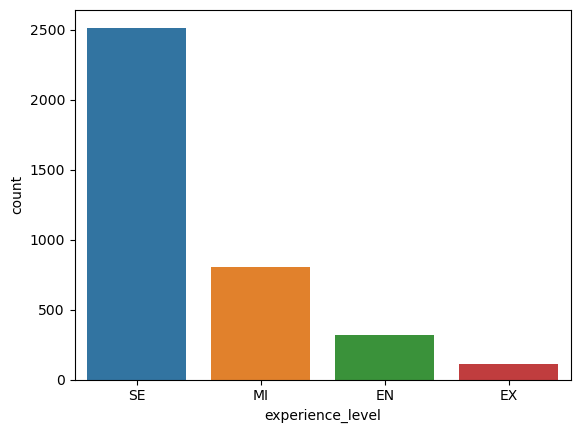

In [7]:
sns.countplot(data = df, x = 'experience_level')

<Axes: xlabel='employment_type', ylabel='count'>

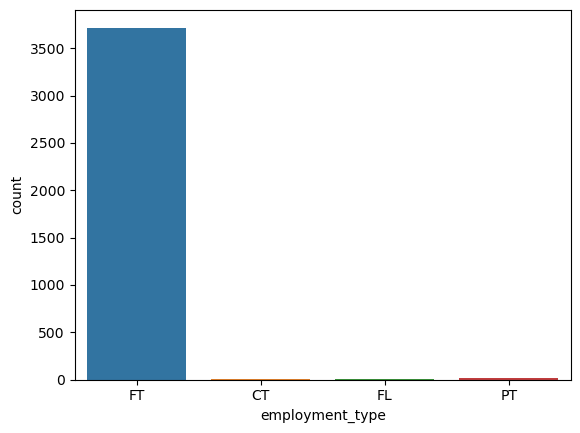

In [8]:
sns.countplot(data = df, x = 'employment_type')

Since most people are working full-time, we can barely see the amount of people that are working the other employment types. I will be "zooming" into these other 3 types by ignoring the full time positions.

<Axes: xlabel='employment_type', ylabel='count'>

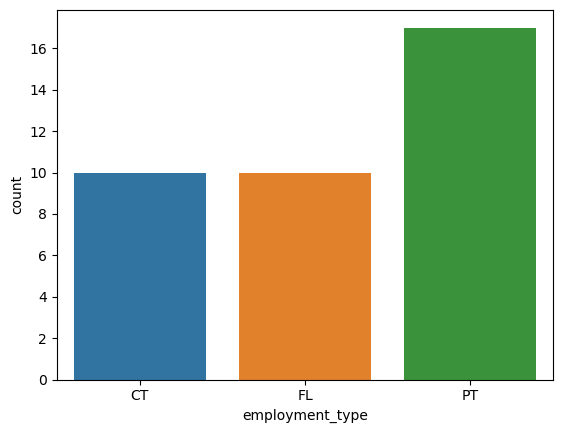

In [9]:
sns.countplot(data = df[df['employment_type'] != 'FT'], x = 'employment_type')

Now we can see that there are 17 part-timers and 10 freelancers and contractors respectively out of the total 3755 employees. That total up to non full-timers to be 37 employees, a whopping 1% of the entire dataset. This means that the dataset is "skewed" to full-timers.

In [10]:
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [11]:
df['job_title'].nunique()

93

In [12]:
top_10_jobs = df.groupby('job_title').count()['salary'].sort_values(ascending = False)[:10]
top_10_jobs

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: salary, dtype: int64

<Axes: xlabel='job_title'>

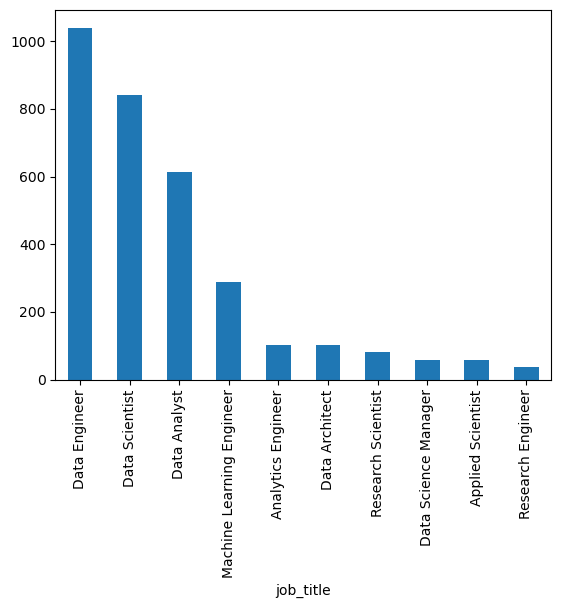

In [13]:
top_10_jobs.plot(kind = 'bar')

In [14]:
top_10_comp_locs = df.groupby('company_location').count()['salary'].sort_values(ascending = False)[:10]
top_10_comp_locs

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
PT      14
AU      14
Name: salary, dtype: int64

<Axes: xlabel='company_location'>

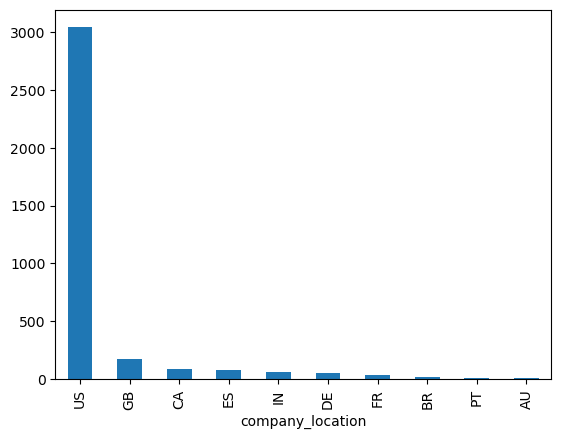

In [15]:
top_10_comp_locs.plot(kind = 'bar')

Here we see that most of the employees are based in the United States. 

In [16]:
round(len(df.query("company_location in ['US', 'CA']")) / len(df['company_location'])*100, 2)

83.28

83.28% of the companies are based in either the US or Canada which might skew the results of any EDA conducted on this dataset.

<Axes: xlabel='company_size', ylabel='count'>

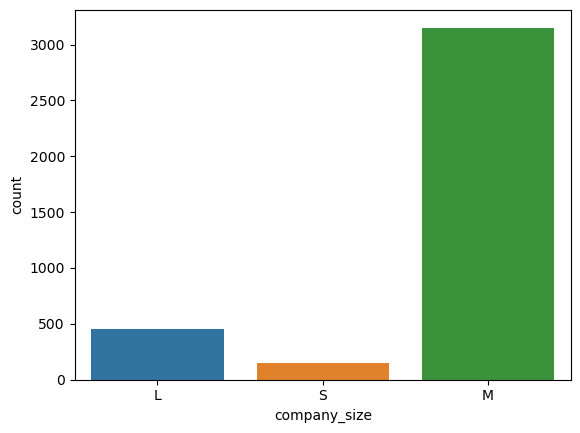

In [17]:
sns.countplot(data = df, x = 'company_size')

Let's now take a look at the salaries.

<Axes: xlabel='remote_ratio', ylabel='count'>

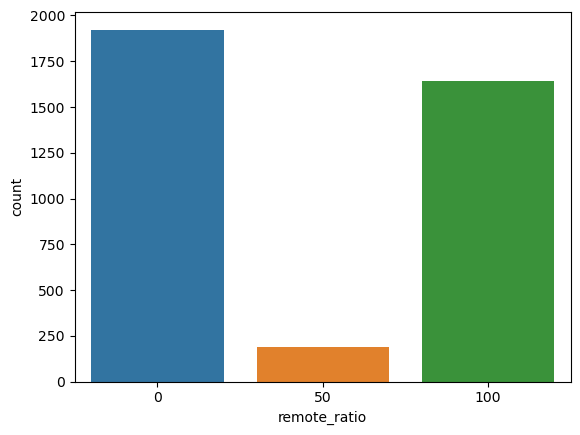

In [18]:
sns.countplot(data = df, x = 'remote_ratio')

<Axes: xlabel='salary_in_usd', ylabel='Count'>

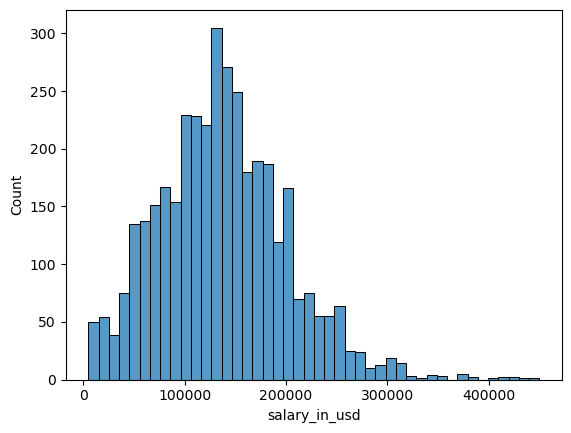

In [19]:
sns.histplot(data = df, x = 'salary_in_usd')

In [20]:
df['salary_in_usd'].describe()

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

As we can see, the mean of salary_in_usd is 137,570 USD which is quite high for an average. Even the bottom 25% makes 95,000 USD per year. We can also see the the mininum is around 5,000 USD which is most likely a freelancer and the maximum is 450,000 USD which is probably an experienced employee.

Next, I will be looking at the correlation between the features:

In [21]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.094724,0.228290,-0.236430
salary,-0.094724,1.000000,-0.023676,0.028731
salary_in_usd,0.228290,-0.023676,1.000000,-0.064171
remote_ratio,-0.236430,0.028731,-0.064171,1.000000


/tmp/ipykernel_20/3636264983.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(), annot = True)


<Axes: >

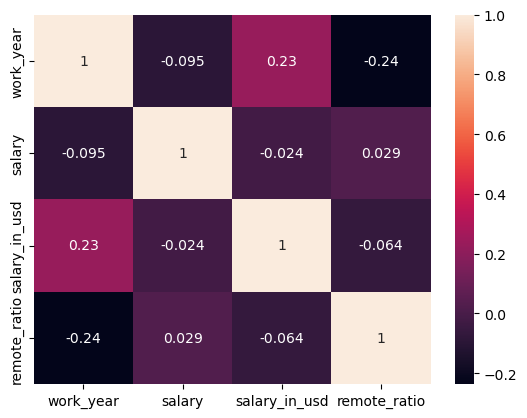

In [22]:
sns.heatmap(data = df.corr(), annot = True)

There seem to not be any major correlations between the numerical features of the dataset. The largest one is correlation between work_year and salary_in_usd which makes sense due to inflation and other similar factors.

I will now find the relationship between the job_title and the salary_in_usd. I will only be looking at the top 10 jobs as they are the most common and make up the most of the dataset as seen in the percentage below:

In [23]:
round(len(df.query("job_title in @top_10_jobs.index.tolist()")) / len(df) * 100, 2)

85.75

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

<Figure size 640x480 with 0 Axes>

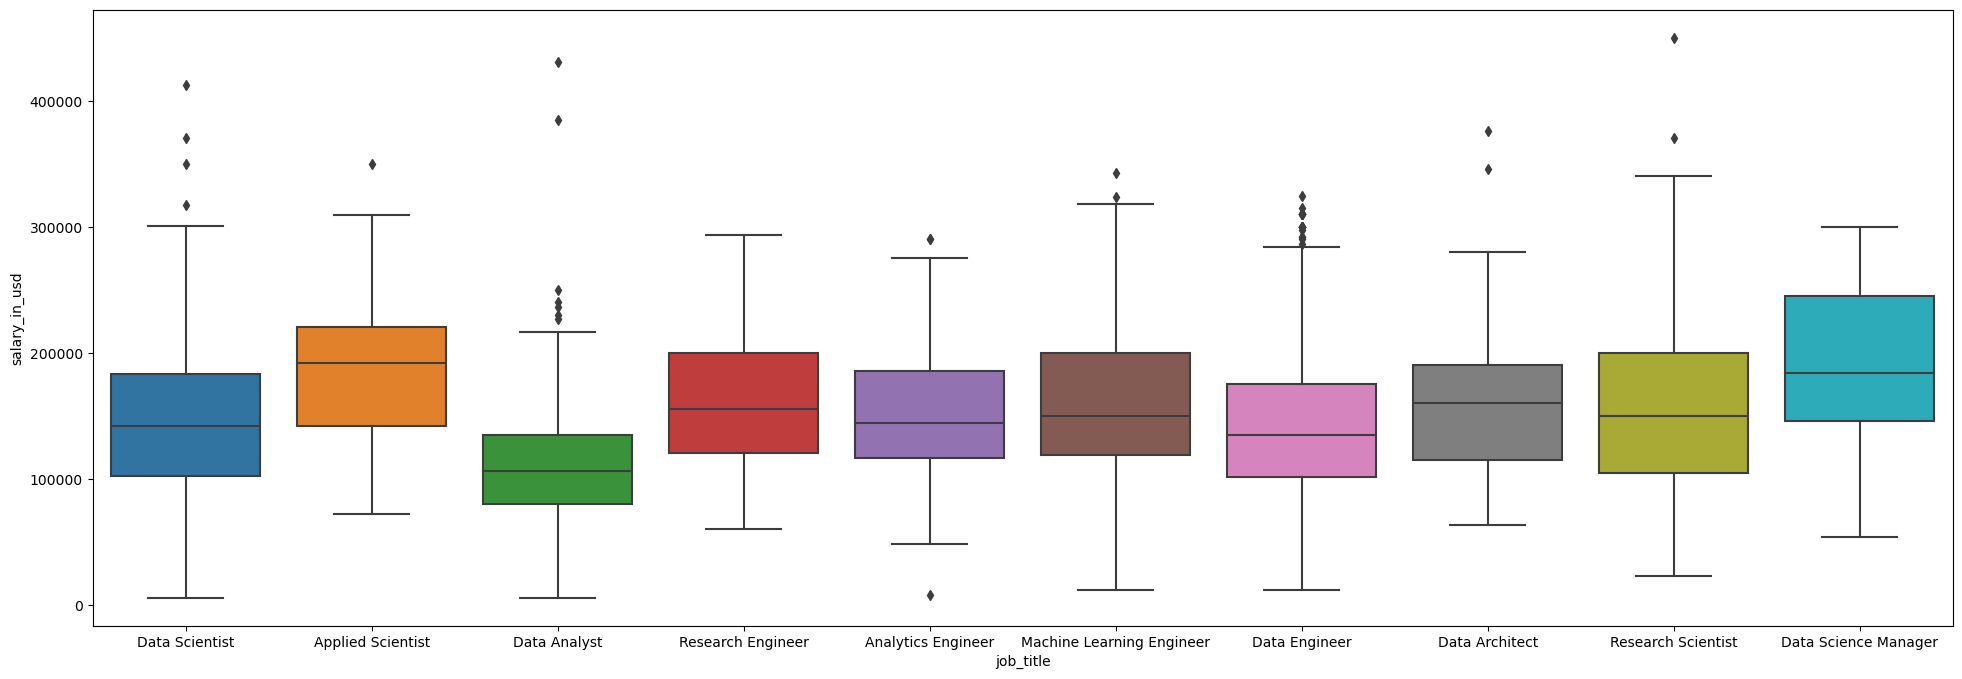

In [24]:
plt.tight_layout()
plt.figure(figsize = (24,8))
sns.boxplot(data = df.query("job_title in @top_10_jobs.index.tolist()"), x = 'job_title', y = 'salary_in_usd')

As we can see from the boxplot abovs, Applied Scientist makes the most on average with the median being around 200,000 USD while the Data Analyst makes the least on average (within the top 10 job titles) with the median being slightly above 100,000 USD. All the other job titles makes somewhere between these two values with varying variances.

Now, let's look at the relationship between company_location and salary_in_usd.

<Axes: xlabel='company_location', ylabel='salary_in_usd'>

<Figure size 640x480 with 0 Axes>

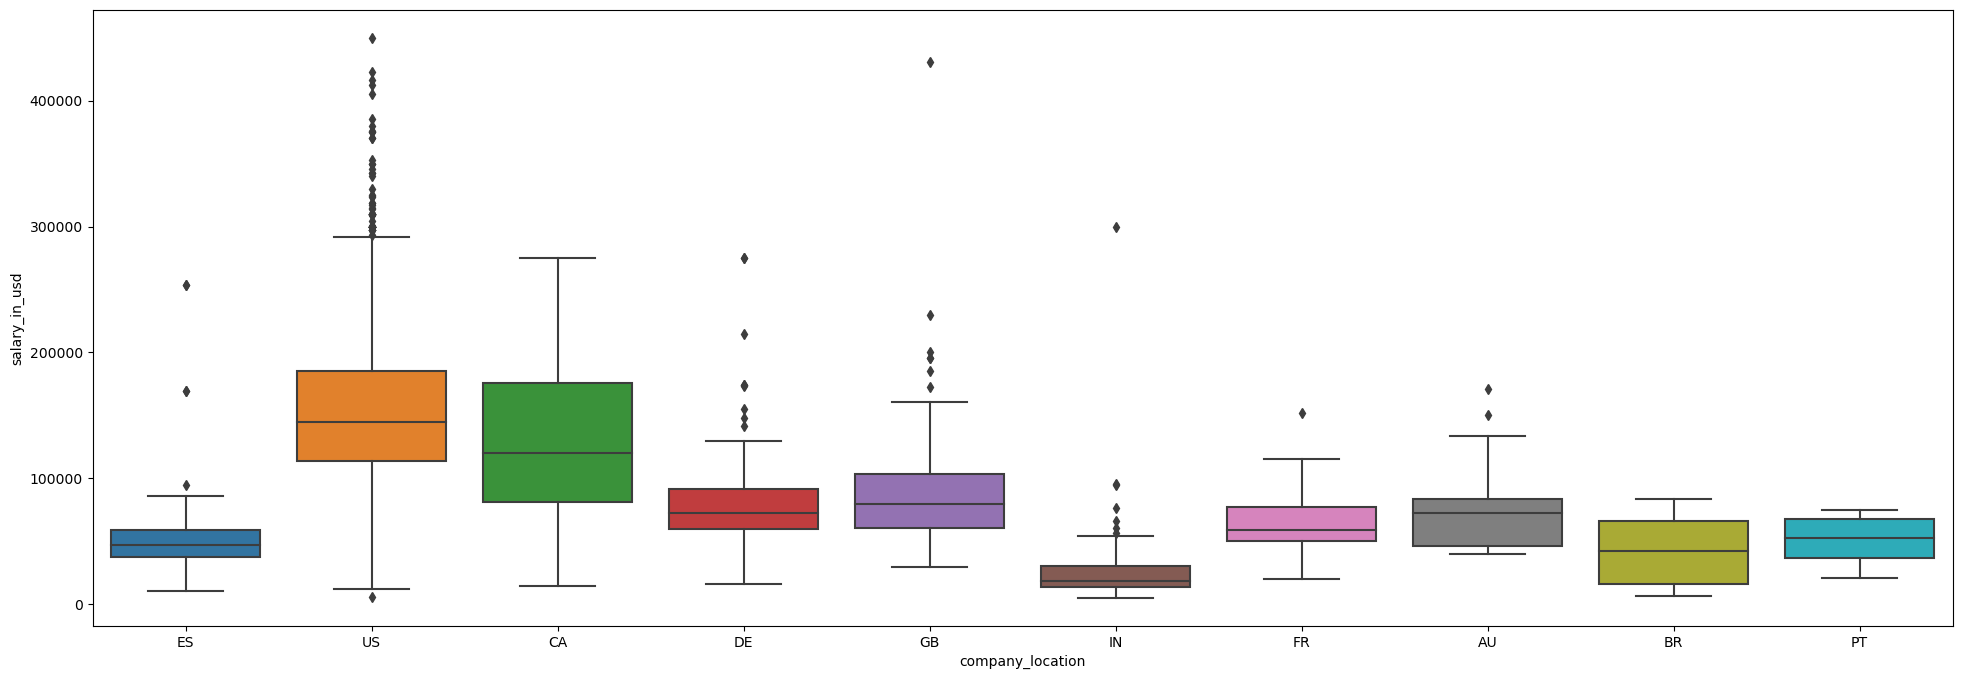

In [25]:
plt.tight_layout()
plt.figure(figsize = (24,8))
sns.boxplot(data = df.query("company_location in @top_10_comp_locs.index.tolist()"), x = 'company_location', y = 'salary_in_usd')

Those who work in the United States earn a higher salary most likely because most of the data in the data set stems from the US. Canada is a close second making it a desirable destination as someone who works in data science. 

What is really interesting to see is that most of the countries actually have an average salary of less than 100,000 USD, while we've seen earlier that the mean of the salary in the data set as a whole is around 135,000 USD. This means that the data set is not a good representation of the salaries of those who work in data science globally as it is more concentrated to North America. To get a better idea on the distribution, let's omit the United States and Canada and run the same visualization.

In [26]:
not_north_america = ['ES', 'DE', 'GB', 'IN', 'FR', 'AU', 'BR', 'PT']

<Axes: xlabel='company_location', ylabel='salary_in_usd'>

<Figure size 640x480 with 0 Axes>

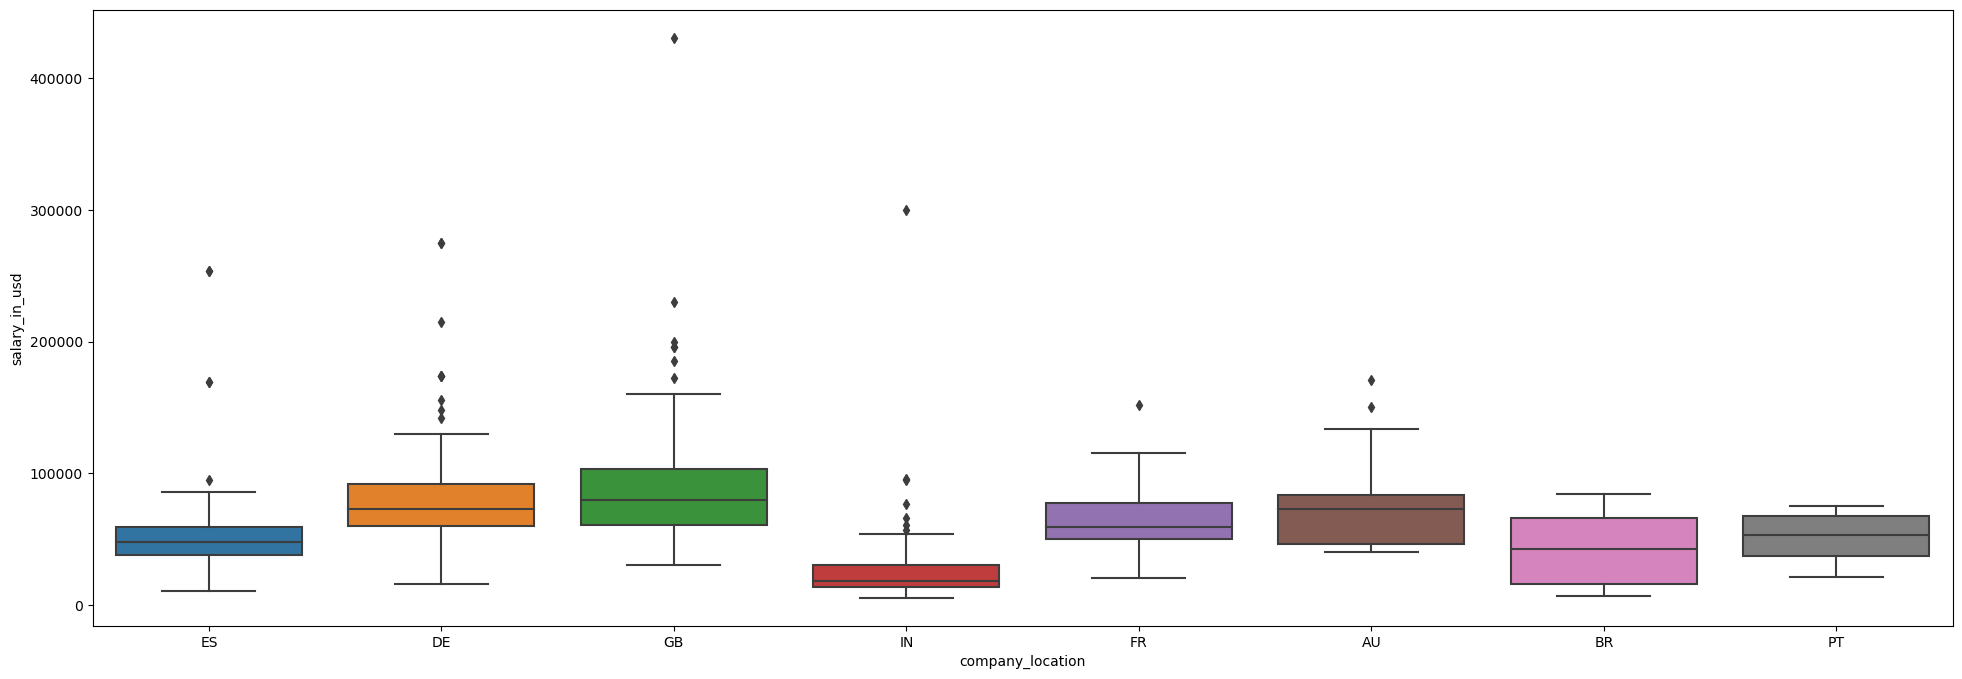

In [27]:
plt.tight_layout()
plt.figure(figsize = (24,8))
sns.boxplot(data = df.query("company_location in @not_north_america"), x = 'company_location', y = 'salary_in_usd')

Unfortunately this visualization does not give a better indication than before as Great Britain has an outlier that earns more than 400,000 USD. But without the presence of the US and Canada, we can see that the other countries are quite equal in their salaries. Though unfortunately, we can see that the boxplots are all skewed towards the bottom indicating that they do not earn as much as those in the US and Canada. We can also see that India makes the least as it seems to have an average of less than 50,000 USD in a year. I will use the describe() function on these 8 countries just to get a better idea of the numbers:

In [28]:
 df.query("company_location in @not_north_america").describe()['salary_in_usd']

count       440.000000
mean      69925.461364
std       46975.854900
min        5409.000000
25%       41694.250000
50%       61566.000000
75%       85847.000000
max      430967.000000
Name: salary_in_usd, dtype: float64

As we can see, the mean dropped down by essentially half from before to only 70,000 USD. The bottom 25% also only has a median of around 42,000 compared to the 95,000 that we see from before. 

One last note though is that it is pretty interesting how Canada has a higher average salary compared to the Great Britain even though the latter has a higher number of employment. I would assume that this is the case simply because Canada is much closer to the US so their salaries are more similar. Perhaps more analysis can be done into this.

That being said, let's move on to other features starting with experience_level and salary_in_usd:

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

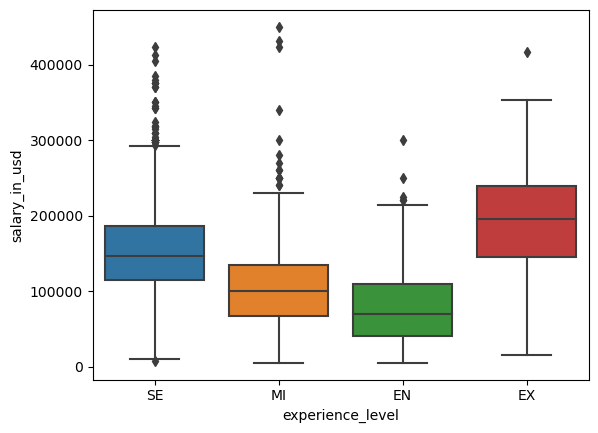

In [29]:
sns.boxplot(data = df, x = 'experience_level', y = 'salary_in_usd')

As expected, entry level positions earn the least out of the 4 experience levels. In second place from the bottom is the mid level position which also makes sense. Then the next two levels are what I found slightly interesting as the executive makes more on average than the senior level positions. I would assume that it is the other way around. 

Perhaps my understanding of professional experience level lingo is skewed and the executives does indeed typically make more than average compared to senior level employees.

Next, we will do the same thing again with employment_type.

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

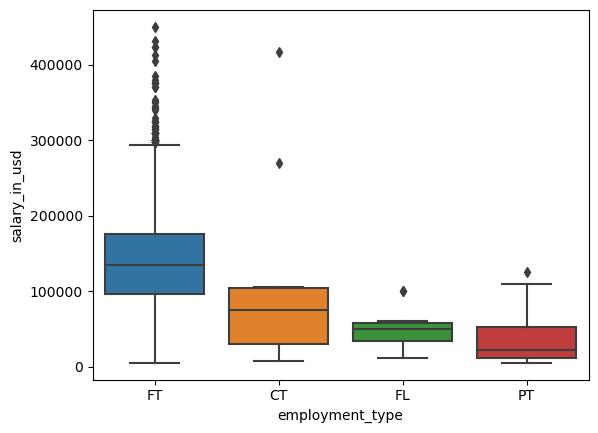

In [30]:
sns.boxplot(data = df, x = 'employment_type', y = 'salary_in_usd')

As expected the full-timers make the most compared to the rest. It is interesting to see how many outliers there are as some of the employees have exceptional contracts. Then, the list goes from contractors to freelancers to part-timers which is not that surprising in my opinion.

Finally, let's see the correlation between company_size and salary_in_usd. I would expect that the larger the company, the higher the salary:

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

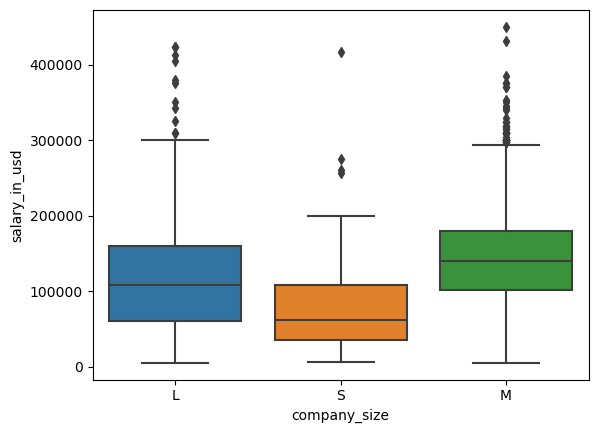

In [31]:
sns.boxplot(data = df, x = 'company_size', y = 'salary_in_usd')

Oh wow look at that. This result is quite surprising to me as I would expect larger companies to pay their employees more than medium sized companies. But open further thought, I guess this makes sense as we have seen earlier that most companies are indeed in medium sized category, combined with the fact that data science as an employment is not really tied to the company the person is working for so the salary is more based off of the market salary. Furthermore, the difference between the 3 sizes are not that substantial so this fact should not be that surprising upon further inspection.

For our final bivariate feature analysis, I will be looking at remote_ratio:

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

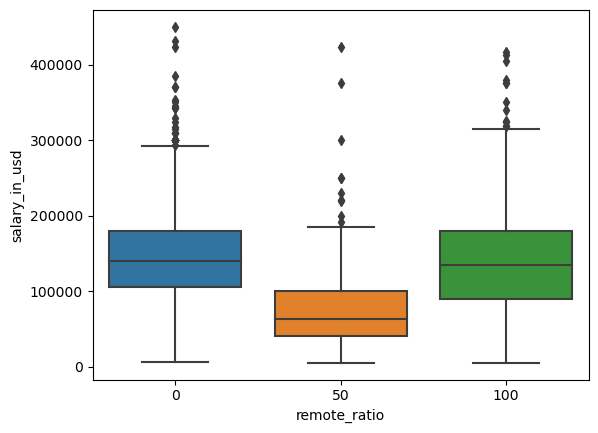

In [32]:
sns.boxplot(data = df, x = 'remote_ratio', y = 'salary_in_usd')

Surprisingly, a 50% ratio earns the least out of all three options. This might be because those who are more serious and experienced about their work are sticking to one method of doing it instead of trying to balance both in-person and remotely. We can analyze this more when compared to the other features as well such as employment_type, experience_level, and job_title which is what I will be doing now.

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

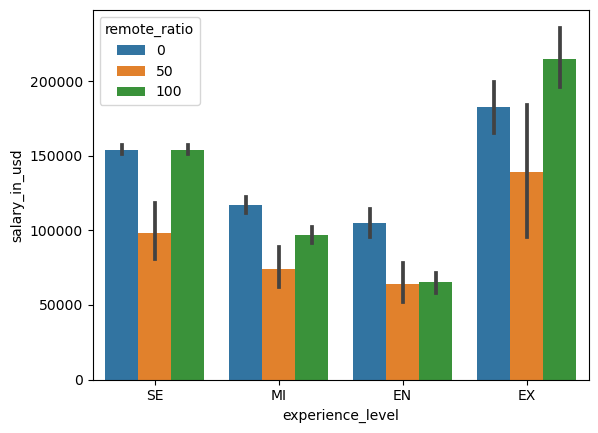

In [33]:
sns.barplot(data = df, x = 'experience_level', y = 'salary_in_usd', hue = 'remote_ratio')

<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

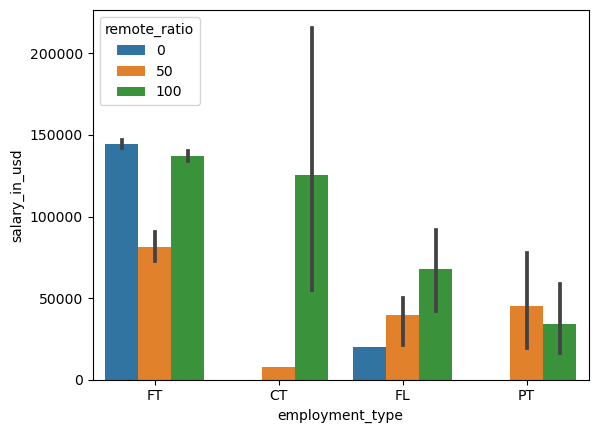

In [34]:
sns.barplot(data = df, x = 'employment_type', y = 'salary_in_usd', hue = 'remote_ratio')

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

<Figure size 640x480 with 0 Axes>

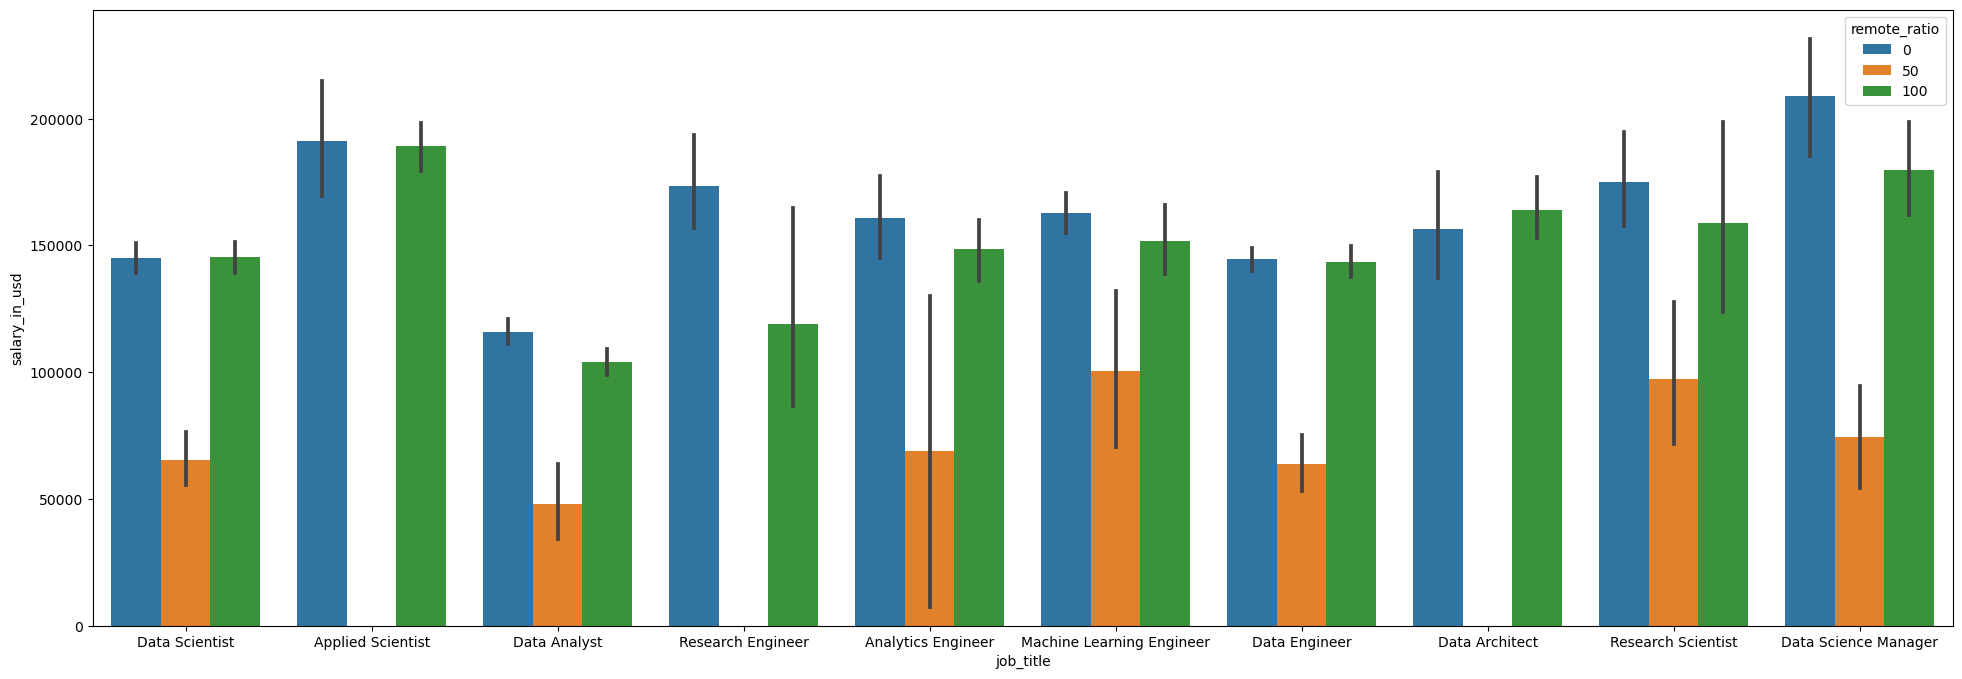

In [35]:
plt.tight_layout()
plt.figure(figsize = (24,8))
sns.barplot(data = df.query("job_title in @top_10_jobs.index.tolist()"),
            x = 'job_title',
            y = 'salary_in_usd',
            hue = 'remote_ratio')

As we can see when compared to all 3 features mentioned, people who have a 50% remote_ratio simply does not earn as much.

But now lets examine work culture across different countries and see the remote_ration based on the countries.

<Axes: xlabel='company_location', ylabel='salary_in_usd'>

<Figure size 640x480 with 0 Axes>

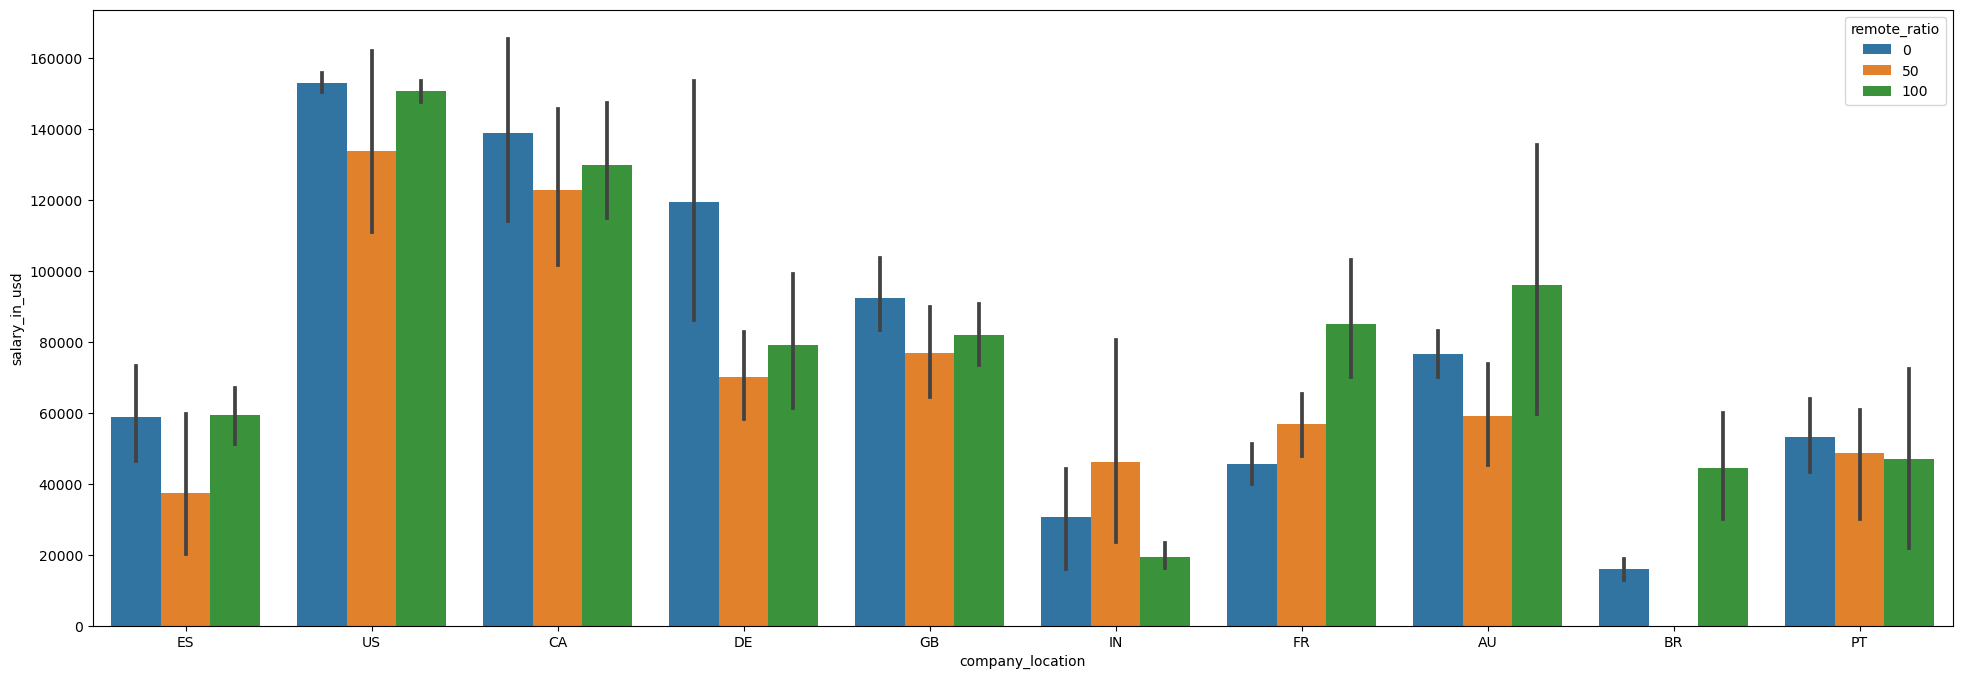

In [36]:
plt.tight_layout()
plt.figure(figsize = (24,8))
sns.barplot(data = df.query("company_location in @top_10_comp_locs.index.tolist()"),
            x = 'company_location',
            y = 'salary_in_usd',
            hue = 'remote_ratio')

I think this is the most interesting graph in this entire EDA. It shows the different cultures across different countries when it comes to data science jobs and how the company and country culture expects the workers to work. We can see that in the US, CA, GB, and especially PT, there is quite a balance between all 3 ratios. This possibly indicates that the companies based in these countries are more lenient with where the employees choose to do their work. 

Then, if we look at FR and AU however, we can see that the majority of the employees are working remotely, indicating a culture of "work-from-home". This is an opposite from DE which observes a significantly higher amount of people who work in-person compared to those who work remotely or 50% remotely. This indicates that the either the companies either enforces the policy of their employees being in-person, or the employees themselves enjoy going to office.

Finally, we have IN, which has the highest number of employees who work 50% remotely. Again, this might indicate that the companies are quite lenient with their in-person policies.

Another factor that I have not touched upon yet to explain this graph is the employment_type and how that correlates with remote_ratio. There is a chance the graph above does not really say anything about culture, but rather an indicator about the different types of employment_types across the countries.

To find out, let's first analyze the remote_ratio with the employment_type.

<Axes: xlabel='employment_type', ylabel='count'>

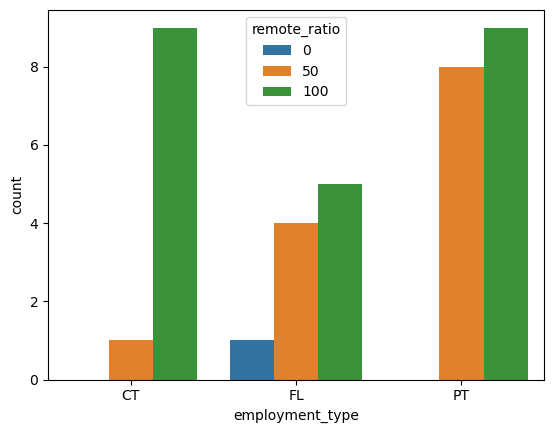

In [37]:
sns.countplot(data = df[df['employment_type'] != 'FT'], x = 'employment_type', hue = 'remote_ratio')

I intentionally excluded full-time numbers as it was too many compared to the others which trumped the graph. Most of the employees who work full time have a remote_ratio of 0% which makes sense. This is further supported by this graph above as those who are not full time are more likely to work remotely. Now let's continue our analysis by examining the employment_type and company_location.

<Axes: xlabel='company_location', ylabel='count'>

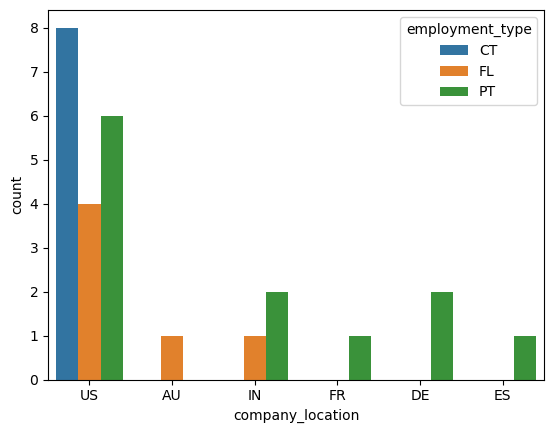

In [38]:
sns.countplot(data = df[df['employment_type'] != 'FT'].query("company_location in @top_10_comp_locs.index.tolist()"), 
              x = 'company_location',
              hue = 'employment_type')

This is really cool. This shows that most companies actually only have full-timers. That means that even though the previous graph between employment_type and remote_ratio makes sense, we cannot use employment_type to explain the correlation between company_location and remote_ratio. Instead the explanation for their distribution is more likely to be explained by the work culture assumption that I have stated before.

This means that through our data analysis, we are able somewhat insinuate and support our assumption that work culture plays a role in the amount of employees that work remotely by country without having the actual data on work culture itself.

Nice :)

That being said, we have to keep in mind that non full-timers only make 1% of the entire data which means that our work culture theory might not be as strong as I have mentioned. But it was still cool doing all the analysis. More analysis can obviously be done to determine this but that is for another time.

Next up, we will be looking at the relationship between employment_type and experience_level:

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

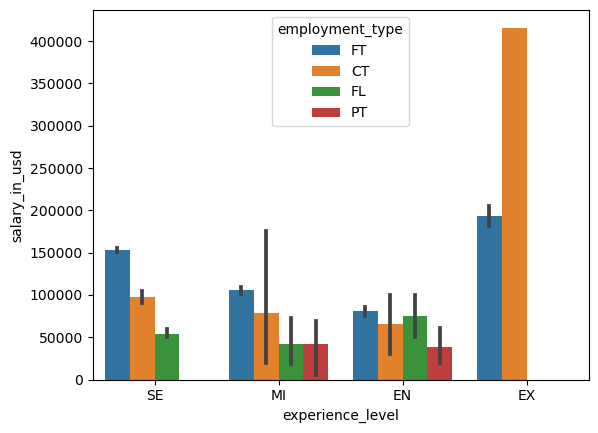

In [39]:
sns.barplot(data = df, x = 'experience_level', y = 'salary_in_usd', hue = 'employment_type')

Here we can see that part timers are only give mid and entry level positions as they aren't committed properly with the company that they are working for. Interestingly however, there are contractors who are given the executive level positions which I am not 100% what the logic is behind that. 

Next we'll look at the different salary_level based on the top 10 job titles and experience level once again:

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

<Figure size 640x480 with 0 Axes>

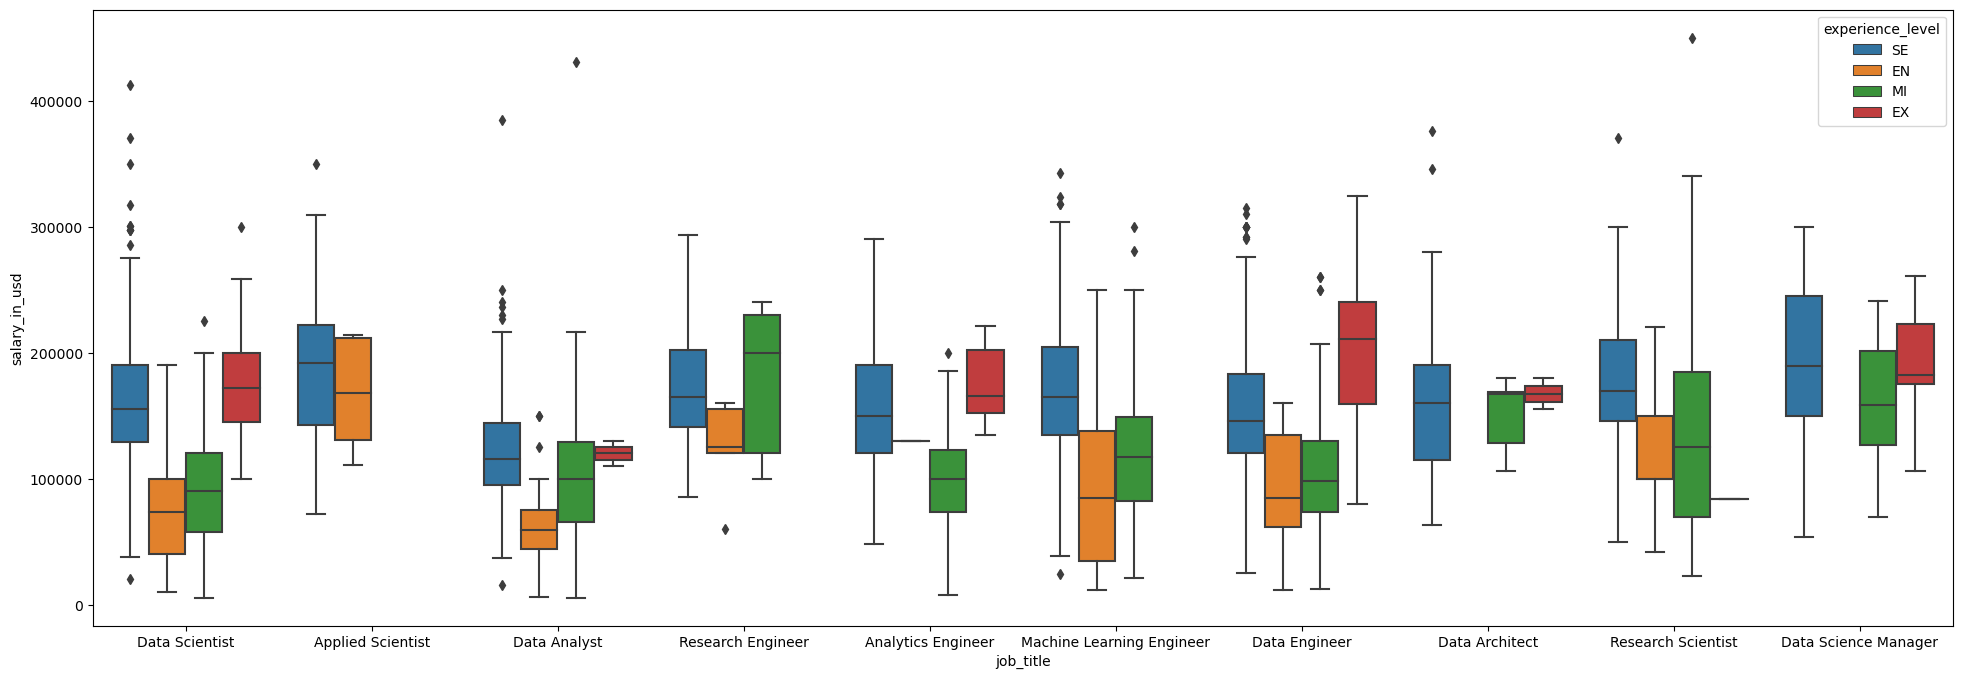

In [40]:
plt.tight_layout()
plt.figure(figsize = (24,8))
sns.boxplot(data = df.query("job_title in @top_10_jobs.index.tolist()"),
            x = 'job_title', 
            y = 'salary_in_usd',
            hue = 'experience_level')

From here, there is nothing that surprising as we see that entry level positions earn the lowest regardless of job title. We also see that seniors and executives typically earn a lot more than the other positions. It is interesting to see however, how in some job titles, the seniors actually earn more than executives (even if it's by a small margin) as one would expect the opposite. Such job titles include Data Analyst, Data Architect, and Data Science Manager. The converse is seen in titles such as Data Scientist, Analytics Engineer, and Data Engineer. The other titles simply does not have an executive experience level which makes sense as they are more research based rather than industry based. These include Applied Scientist, Research Engineer, Machine Learning Engineer, and more or less Research Scientist.

Next, let's look at the difference between the salary and job title based on whether they work in the US or Canada (I'm omitting the rest of the countries as most of our dataset are concentrated in these two countries):

<Axes: xlabel='job_title', ylabel='salary_in_usd'>

<Figure size 640x480 with 0 Axes>

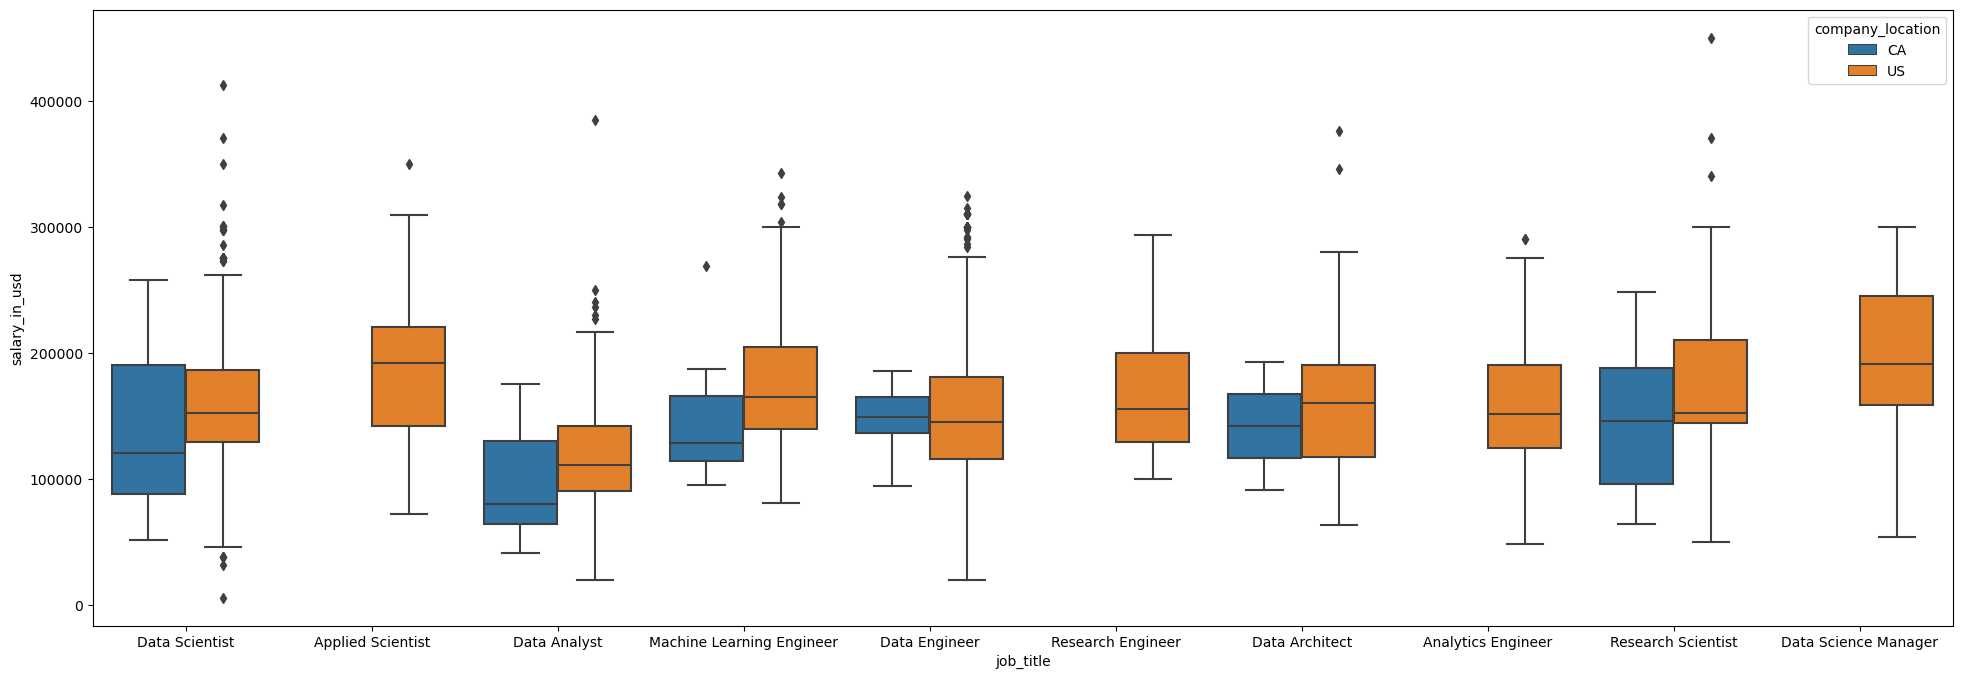

In [41]:
plt.tight_layout()
plt.figure(figsize = (24,8))
sns.boxplot(data = df[(df['company_location'] == 'CA') | (df['company_location'] == 'US')].query("job_title in @top_10_jobs.index.tolist()"),
            x = 'job_title',
            y = 'salary_in_usd',
            hue = 'company_location')

As we can see, the US beats Canada in terms of salary in all the positions except Data Scientist. But even for that role, Canada only has a slight edge for its top 25% of performers; the US still maintains a lead in the average salary. This indicates that the US is a better market for Data Science roles compared to Canada.

# Data Cleaning

I will now be cleaning the data with the idea of regression in mind. Later, I will be building a regression model to predict the salaries based on the other features.

First, let's check if we have any missing data and deal with those.

## Missing Data

In [42]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Perfect! There are no missing data!

## Categorical Variables

In [43]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [44]:
df.select_dtypes(include = 'object').columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

Currently, I am looking at all the categorical features and will convert the relevant ones into dummy columns. I will also drop some of the features if I deem it to be irrelevant to the regression model that I will be building. For example, salary_currency is not important since I will only be analyzing the salaries in USD. 

In [45]:
# Dropping salary_currency
df = df.drop('salary_currency', axis = 1)

In [46]:
# Creating dummy columns for experience_level
experience_dummy = pd.get_dummies(df['experience_level'], dtype = int, drop_first = True)
df = pd.concat([df.drop('experience_level', axis = 1), experience_dummy], axis = 1)
df.columns

Index(['work_year', 'employment_type', 'job_title', 'salary', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'EX', 'MI', 'SE'],
      dtype='object')

In [47]:
# Creating dummy columns for employment_type
employment_dummy = pd.get_dummies(df['employment_type'], dtype = int, drop_first = True)
df = pd.concat([df.drop('employment_type', axis = 1), employment_dummy], axis = 1)
df.columns

Index(['work_year', 'job_title', 'salary', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'EX', 'MI', 'SE', 'FL', 'FT', 'PT'],
      dtype='object')

In [48]:
# Creating dummy columns for company_size
company_size_dummy = pd.get_dummies(df['company_size'], dtype = int, drop_first = True)
df = pd.concat([df.drop('company_size', axis = 1), company_size_dummy], axis = 1)
df.columns

Index(['work_year', 'job_title', 'salary', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location', 'EX', 'MI',
       'SE', 'FL', 'FT', 'PT', 'M', 'S'],
      dtype='object')

In [49]:
df.select_dtypes(include = 'object').columns

Index(['job_title', 'employee_residence', 'company_location'], dtype='object')

Let's look at some EDA for employee_residence:

In [50]:
df['employee_residence'].nunique()

78

<Axes: xlabel='employee_residence', ylabel='salary_in_usd'>

<Figure size 640x480 with 0 Axes>

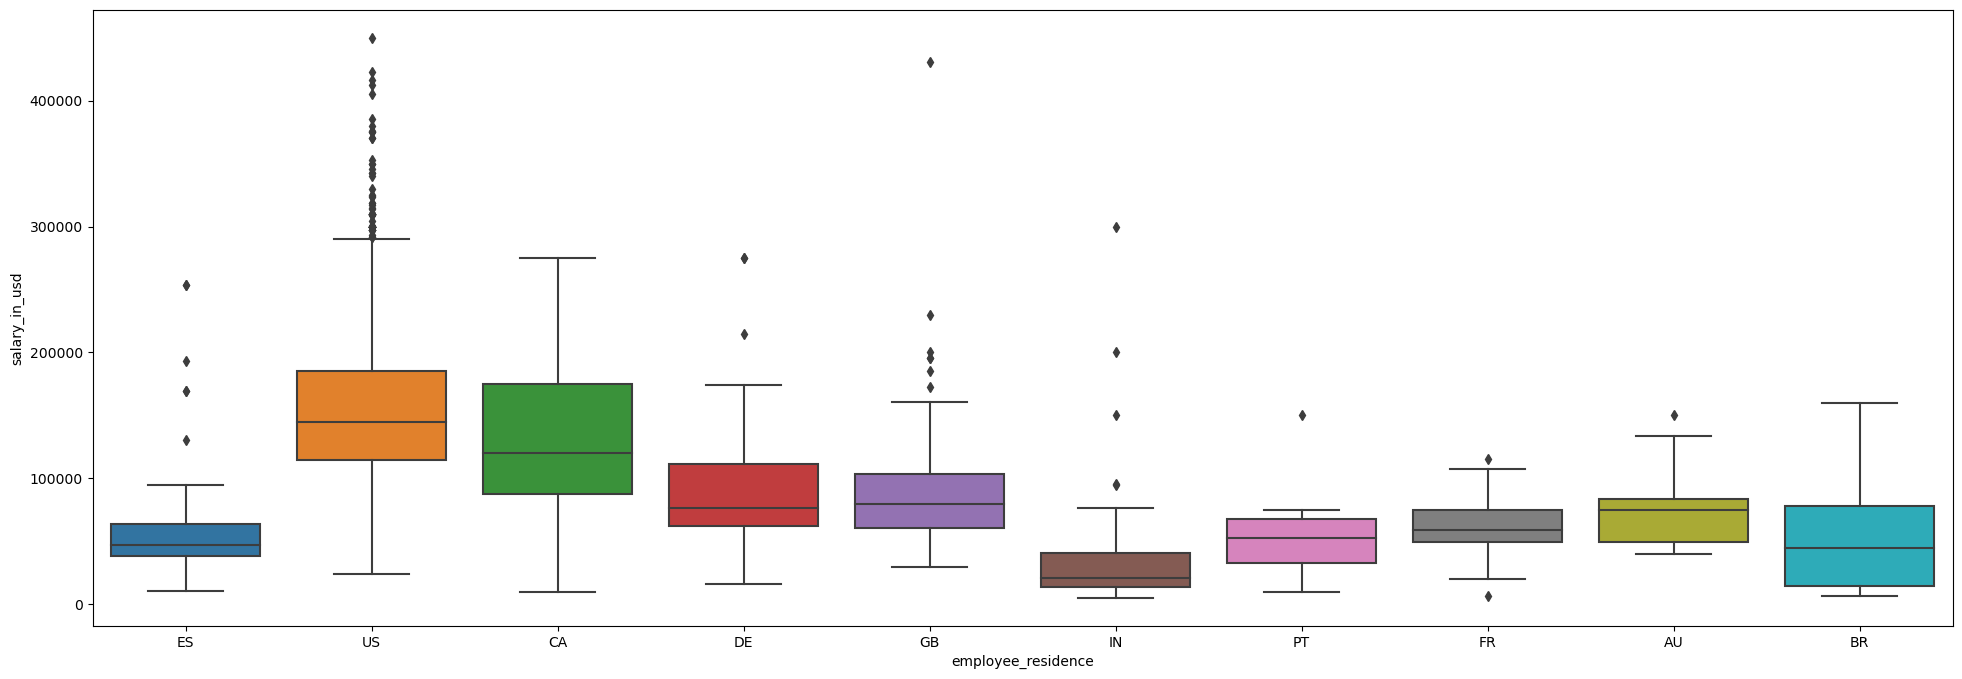

In [51]:
plt.tight_layout()
plt.figure(figsize = (24,8))
sns.boxplot(data = df.query("employee_residence in @top_10_comp_locs.index.tolist()"), x = 'employee_residence', y = 'salary_in_usd')

This distribution seems very similar to company_location. Let's see if the employee working in the same country as the location of the company will influence the salary.

In [52]:
# Creating a column that states 1 if the employee is in the same country as the company location and 0 if otherwise
df['same_location'] = np.where(df['company_location'] == df['employee_residence'], 1, 0)

In [53]:
df['same_location'].value_counts()

1    3659
0      96
Name: same_location, dtype: int64

<Axes: xlabel='same_location', ylabel='salary_in_usd'>

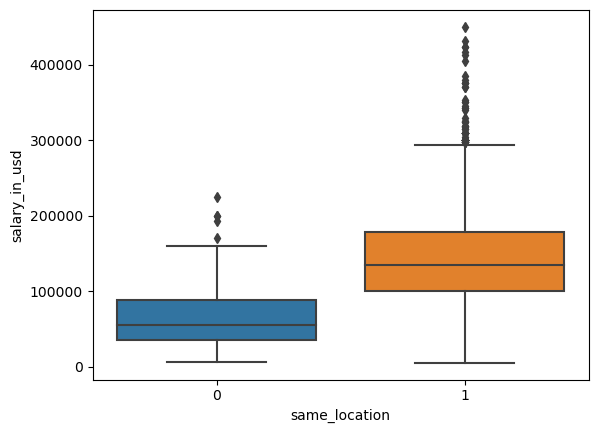

In [54]:
sns.boxplot(data = df, x = 'same_location', y = 'salary_in_usd')

As we can see, there is a significant difference in the salary_in_usd depending on the value of same_location. Therefore, we should keep this feature in our model. We can however, drop the employee_residence as that feature by itself does not say much about the person's salary.

In [55]:
df = df.drop('employee_residence', axis = 1)

In [56]:
df.select_dtypes(include = 'object').columns

Index(['job_title', 'company_location'], dtype='object')

Down to 2 categorical variables! Let's move along with company location first. Since there are about 78 different countries in this dataset but most employees are centralized to the top 10, let's see if we can group together the non top 10 countries into one value called "other". Let's first check if 10 is the number we should keep for the distinct countries:

In [57]:
round(len(df.query("company_location in @top_10_comp_locs.index.tolist()")) / len(df['company_location'])*100, 2)

94.99

The top 10 countries make up basically 95% of the entire dataset. We shall now group the rest of the 5% into a country titled "other". The reason for this is to reduce the number features which would help the regression model later on.

In [58]:
def change_to_other(country):
    if country not in top_10_comp_locs.index.tolist():
        return "Other"
    return country

In [59]:
df['company_location'] = df['company_location'].apply(lambda country: change_to_other(country))

In [60]:
df['company_location'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'Other', 'IN', 'FR', 'AU', 'BR',
       'PT'], dtype=object)

In [61]:
df['company_location'].value_counts()

US       3040
Other     188
GB        172
CA         87
ES         77
IN         58
DE         56
FR         34
BR         15
AU         14
PT         14
Name: company_location, dtype: int64

Now, we only have 11 unique values for company_location. Let's make dummy columns for company_location:

In [62]:
company_location_dummy = pd.get_dummies(df['company_location'], dtype = int, drop_first = True)
df = pd.concat([df.drop('company_location', axis = 1), company_location_dummy], axis = 1)
df.columns

Index(['work_year', 'job_title', 'salary', 'salary_in_usd', 'remote_ratio',
       'EX', 'MI', 'SE', 'FL', 'FT', 'PT', 'M', 'S', 'same_location', 'BR',
       'CA', 'DE', 'ES', 'FR', 'GB', 'IN', 'Other', 'PT', 'US'],
      dtype='object')

In [63]:
df.select_dtypes(include = 'object').columns

Index(['job_title'], dtype='object')

Now, we're only left with job_title as a categorical feature. Again, there are too many distinct job_titles so we will try to reduce this. Let's look at how many distinct jobs there are and what there as well:

In [64]:
# Number of distinct job_title
df['job_title'].nunique()

93

In [65]:
# All the unique job titles
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [66]:
# For reference, here are the top 10 jobs that makes up the data set
print(top_10_jobs.index.tolist())

# The percentage that these 10 jobs make up of the data set
print(round(len(df.query("job_title in @top_10_jobs.index.tolist()")) / len(df) * 100, 2))

['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer', 'Data Architect', 'Research Scientist', 'Data Science Manager', 'Applied Scientist', 'Research Engineer']
85.75


In [67]:
def convert_into_top_10_jobs(job):
    if job not in top_10_jobs.index.tolist():
        if 'Data Analyst' in job:
            return 'Data Analyst'
        if ('Machine Learning' in job) and ('Engineer' in job):
            return 'Machine Learning Engineer'
        if 'Applied' in job:
            return 'Applied Scientist'
        if 'Manager' in job:
            return 'Data Science Manager'
        if 'Analytics Engineer' in job:
            return 'Analytics Engineer'
        if 'Data Engineer' in job:
            return 'Data Engineer'
        if 'Data Scientist' in job:
            return 'Data Scientist'
        if 'Architect' in job:
            return 'Data Architect'
        return 'Other Job Title'
    return job

In [68]:
df['job_title'] = df['job_title'].apply(lambda job: convert_into_top_10_jobs(job))

In [69]:
df['job_title'].unique()

array(['Data Scientist', 'Other Job Title', 'Applied Scientist',
       'Data Analyst', 'Research Engineer', 'Analytics Engineer',
       'Machine Learning Engineer', 'Data Engineer', 'Data Architect',
       'Research Scientist', 'Data Science Manager'], dtype=object)

In [70]:
df['job_title'].value_counts()

Data Engineer                1067
Data Scientist                861
Data Analyst                  662
Machine Learning Engineer     320
Other Job Title               319
Data Science Manager          113
Analytics Engineer            109
Data Architect                105
Research Scientist             82
Applied Scientist              80
Research Engineer              37
Name: job_title, dtype: int64

Perfect! Now that data is cleaner and we can turn the job_title feature into its dummy columns:

In [71]:
job_title_dummy = pd.get_dummies(df['job_title'], dtype = int, drop_first = True)
df = pd.concat([df.drop('job_title', axis = 1), job_title_dummy], axis = 1)
df.columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio', 'EX', 'MI',
       'SE', 'FL', 'FT', 'PT', 'M', 'S', 'same_location', 'BR', 'CA', 'DE',
       'ES', 'FR', 'GB', 'IN', 'Other', 'PT', 'US', 'Applied Scientist',
       'Data Analyst', 'Data Architect', 'Data Engineer',
       'Data Science Manager', 'Data Scientist', 'Machine Learning Engineer',
       'Other Job Title', 'Research Engineer', 'Research Scientist'],
      dtype='object')

In [72]:
df.select_dtypes(include = 'object').columns

Index([], dtype='object')

## Numerical Features

In [73]:
df.select_dtypes(include = 'int').columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio', 'EX', 'MI',
       'SE', 'FL', 'FT', 'PT', 'M', 'S', 'same_location', 'BR', 'CA', 'DE',
       'ES', 'FR', 'GB', 'IN', 'Other', 'PT', 'US', 'Applied Scientist',
       'Data Analyst', 'Data Architect', 'Data Engineer',
       'Data Science Manager', 'Data Scientist', 'Machine Learning Engineer',
       'Other Job Title', 'Research Engineer', 'Research Scientist'],
      dtype='object')

Again, let's get rid of features that are irrelevant to our model. This would be the salary feature as we are only dealing with salary_in_usd.

In [74]:
df = df.drop('salary', axis = 1)

Next, notice that work_year is actually a categorical variable as the year values are not continuous (it can't be). So, let's create dummy variables for this too.

In [75]:
work_year_dummy = pd.get_dummies(df['work_year'], dtype = int, drop_first = True)
df = pd.concat([df.drop('work_year', axis = 1), work_year_dummy], axis = 1)
df.columns

Index([            'salary_in_usd',              'remote_ratio',
                              'EX',                        'MI',
                              'SE',                        'FL',
                              'FT',                        'PT',
                               'M',                         'S',
                   'same_location',                        'BR',
                              'CA',                        'DE',
                              'ES',                        'FR',
                              'GB',                        'IN',
                           'Other',                        'PT',
                              'US',         'Applied Scientist',
                    'Data Analyst',            'Data Architect',
                   'Data Engineer',      'Data Science Manager',
                  'Data Scientist', 'Machine Learning Engineer',
                 'Other Job Title',         'Research Engineer',
              'Research S

In [76]:
remote_ratio_dummy = pd.get_dummies(df['remote_ratio'], dtype = int, drop_first = True)
df = pd.concat([df.drop('remote_ratio', axis = 1), remote_ratio_dummy], axis = 1)
df.columns

Index([            'salary_in_usd',                        'EX',
                              'MI',                        'SE',
                              'FL',                        'FT',
                              'PT',                         'M',
                               'S',             'same_location',
                              'BR',                        'CA',
                              'DE',                        'ES',
                              'FR',                        'GB',
                              'IN',                     'Other',
                              'PT',                        'US',
               'Applied Scientist',              'Data Analyst',
                  'Data Architect',             'Data Engineer',
            'Data Science Manager',            'Data Scientist',
       'Machine Learning Engineer',           'Other Job Title',
               'Research Engineer',        'Research Scientist',
                         

Now it's done! All of our features are now numerical except for salary_in_usd which is what we are trying to predict. We can now continue with creating the regression model.

# Creating a Model

## Train Test Split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = df.drop('salary_in_usd', axis = 1).values
y = df['salary_in_usd'].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scaling

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()

In [82]:
X_train = scaler.fit_transform(X_train)

In [83]:
X_test = scaler.transform(X_test)

## Regression Model

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lm = LinearRegression()

In [86]:
lm.fit(X_train, y_train)

LinearRegression()

In [87]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

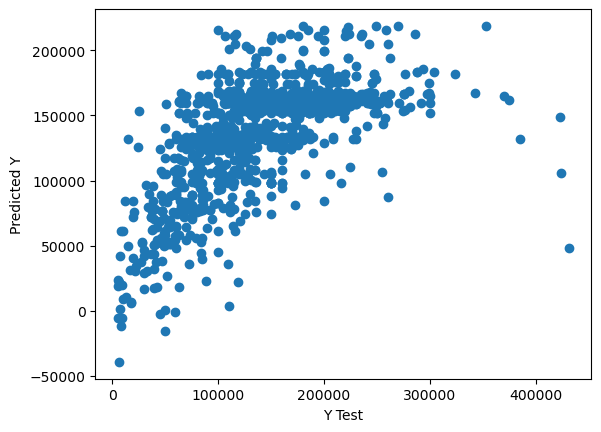

In [88]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

As we can see, this is bad as the plot between the predicted values and the true values are nowhere near the same which can be seen by the non-linearity of the plot above. 

# Neural Network

I will now try using a neural network instead to see if that performs any better.

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [90]:
model = Sequential()

model.add(Dense(24, activation = 'relu')) # number of features
model.add(Dense(24, activation = 'relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

In [91]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/100
11/11 [==============================] - 1s 21ms/step - loss: 23003052032.0000 - val_loss: 22661548032.0000
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 23002961920.0000 - val_loss: 22661457920.0000
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 23002849280.0000 - val_loss: 22661312512.0000
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 23002652672.0000 - val_loss: 22661027840.0000
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 23002247168.0000 - val_loss: 22660435968.0000
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 23001430016.0000 - val_loss: 22659254272.0000
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 22999781376.0000 - val_loss: 22656915456.0000
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 22996584448.0000 - val_loss: 22652385280.0000
Epoch 9/100
11/11 [============================

In [92]:
losses = pd.DataFrame(model.history.history)

<Axes: >

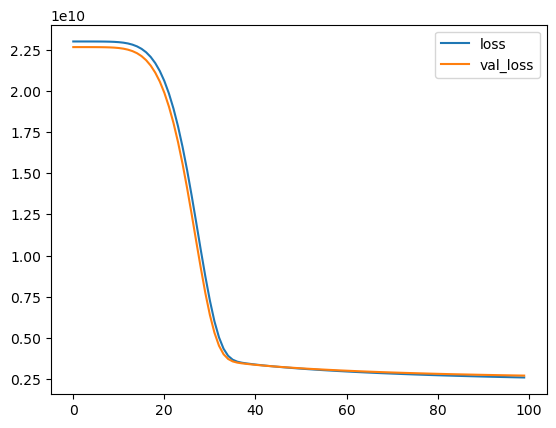

In [93]:
losses.plot()

This is want was wanted from the comparison between training loss and validation loss.

# Predictions and Evaluating NN

In [94]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [95]:
predictions = model.predict(X_test)

36/36 [==============================] - 0s 1ms/step


In [96]:
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("MAE:", mean_absolute_error(y_test, predictions))
print("Explained variance score:", explained_variance_score(y_test, predictions))

MSE: 2710621259.429457
RMSE: 52063.627029140574
MAE: 39300.59798552573
Explained variance score: 0.31663443053169604


These are not exactly good values especially the explained variance score as it is closer to 0 than it is to 1. Still need to reevaluate my data cleaning and preprocessing.

# Conclusion

EDA:
* Most people are have a senior level position.
* 99% of the entries have a full-time position rather than a part-time, contractual, or freelancing position.
* There are 93 unique job titles in the dataset.
* The top 10 job titles that makes up 85.75% of the dataset are:
    * Data Engineer                (1040)
    * Data Scientist                (840)
    * Data Analyst                  (612)
    * Machine Learning Engineer     (289)
    * Analytics Engineer            (103)
    * Data Architect                (101)
    * Research Scientist             (82)
    * Data Science Manager           (58)
    * Applied Scientist              (58)
    * Research Engineer              (37)
* Applied Scientist has the highest median salary at around 200,000 USD per annum.
* Data Analyst has the lowest median salary (amongst the top 10 job titles) at around 100,000 USD per annum.
* Most companies are medium-sized as opposed to large-sized or small-sized companies.
* 83.28% of the companies in the dataset comes are based either in the US or Canada.
* Including the companies that are based in the US or Canada, the median salary of the dataset is 137,570 USD.
* Excluding the US and Canada however, the median salary dropped down to only 69,925 USD.
* Based on experience level, the lowest to highest median salaries goes as follows: Entry-level, Mid-level, Senior-level, Executive.
* Based on employment type, the lowest to highest median salaries goes as follows: Freelancer, Part-timer, Contractor, Full-timer.

Regression model:
* Attempted to create a linear regression model to predict the salary of a given employee in US dollars based on the other features as predictors.
* Unfortunately, the linear model did not work as well as seen in the scatterplot between the predictions of the test set and the true values of the test set. This scatterplot should be a linear line as they error between the prediction values and the true values should not be that great. 
* One of the main reasons of why the linear model did not work might be because there are too many outliers in the dataset.
* On top of that, since almost 90% of the dataset is made up of companies that are based in the US or Canada, it might have skewed the training model even more as it does not create a realistic representation of the data. 
* Future corrections:
    * Maybe only group the countries as US, Canada, and Others instead.
    * Omit any rows that contain outliers with respect to the salary_in_usd feature.

Neural network:
* The training and validation loss looks good graphically and conceptually as there is no overfitting or underfitting.
* Unfortunately, however, there is something very wrong fundamentally as the explained variance is only around 34% which means that our model can only explain 34% of the variance that happens in the data. 
* I will try again after omitting the outliers.

# Attempt 2

In [97]:
df = pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')

In [98]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [99]:
df['salary_in_usd'].quantile(0.25)

95000.0

In [100]:
df['salary_in_usd'].quantile(0.75)

175000.0

In [101]:
175000-95000

80000

In [102]:
outliers = df[(df['salary_in_usd'] < 95000 - 1.5*80000) | (df['salary_in_usd'] > 175000 + 1.5*80000)]

In [103]:
outliers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
33,2023,SE,FT,Computer Vision Engineer,342810,USD,342810,US,0,US,M
68,2023,SE,FT,Applied Scientist,309400,USD,309400,US,0,US,L
83,2022,EN,FT,AI Developer,300000,USD,300000,IN,50,IN,L
133,2023,SE,FT,Machine Learning Engineer,342300,USD,342300,US,0,US,L
145,2023,SE,FT,Machine Learning Engineer,318300,USD,318300,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
3697,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L


In [104]:
round((len(outliers)/len(df))*100,2)

1.68

Since the outliers only make up for 1.68% of the dataset, we can go ahead and drop them.

In [105]:
df = df.drop(outliers.index.tolist())

Now that we have dropped the outliers, we can proceed with the same steps of data cleaning as before:

In [106]:
df['company_location'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI', 'MX',
       'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE', 'GR',
       'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT', 'AS',
       'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK', 'BO',
       'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ', 'IQ',
       'CN', 'NZ', 'CL', 'MD', 'IL', 'MT'], dtype=object)

In [107]:
by_country = df.groupby(by = 'company_location')
by_country.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3729,2021,EN,FT,AI Scientist,1335000,INR,18053,IN,100,AS,S
3731,2020,MI,FT,Data Scientist,55000,EUR,62726,FR,50,LU,S
3744,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,100,HR,S
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M


<Axes: xlabel='company_location', ylabel='salary_in_usd'>

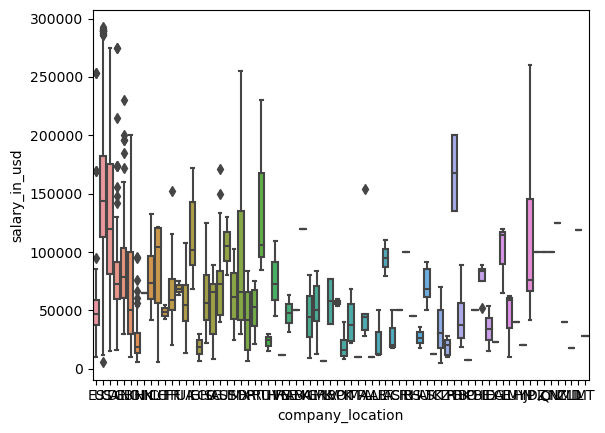

In [108]:
sns.boxplot(df, x = 'company_location', y = 'salary_in_usd')

In [109]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [110]:
df = df.drop('salary', axis = 1)

In [111]:
df = df.drop('salary_currency', axis = 1)

In [112]:
df = df.drop('employee_residence', axis = 1)

In [113]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,100,ES,L
1,2023,MI,CT,ML Engineer,30000,100,US,S
2,2023,MI,CT,ML Engineer,25500,100,US,S
3,2023,SE,FT,Data Scientist,175000,100,CA,M
4,2023,SE,FT,Data Scientist,120000,100,CA,M


Now to create dummy variables:

In [114]:
# Creating dummy columns for experience_level
experience_dummy = pd.get_dummies(df['experience_level'], dtype = int, drop_first = True)
df = pd.concat([df.drop('experience_level', axis = 1), experience_dummy], axis = 1)
df.columns

Index(['work_year', 'employment_type', 'job_title', 'salary_in_usd',
       'remote_ratio', 'company_location', 'company_size', 'EX', 'MI', 'SE'],
      dtype='object')

In [115]:
# Creating dummy columns for employment_type
employment_dummy = pd.get_dummies(df['employment_type'], dtype = int, drop_first = True)
df = pd.concat([df.drop('employment_type', axis = 1), employment_dummy], axis = 1)
df.columns

Index(['work_year', 'job_title', 'salary_in_usd', 'remote_ratio',
       'company_location', 'company_size', 'EX', 'MI', 'SE', 'FL', 'FT', 'PT'],
      dtype='object')

In [116]:
# Creating dummy columns for work_year
year_dummy = pd.get_dummies(df['work_year'], dtype = int, drop_first = True)
df = pd.concat([df.drop('work_year', axis = 1), year_dummy], axis = 1)
df.columns

Index([       'job_title',    'salary_in_usd',     'remote_ratio',
       'company_location',     'company_size',               'EX',
                     'MI',               'SE',               'FL',
                     'FT',               'PT',               2021,
                     2022,               2023],
      dtype='object')

In [117]:
# Creating dummy columns for remote_ratio
ratio_dummy = pd.get_dummies(df['remote_ratio'], dtype = int, drop_first = True)
df = pd.concat([df.drop('remote_ratio', axis = 1), ratio_dummy], axis = 1)
df.columns

Index([       'job_title',    'salary_in_usd', 'company_location',
           'company_size',               'EX',               'MI',
                     'SE',               'FL',               'FT',
                     'PT',               2021,               2022,
                     2023,                 50,                100],
      dtype='object')

In [118]:
# TEST
# df = df.drop('remote_ratio', axis = 1)

In [119]:
# Creating dummy columns for company_size
company_size_dummy = pd.get_dummies(df['company_size'], dtype = int, drop_first = True)
df = pd.concat([df.drop('company_size', axis = 1), company_size_dummy], axis = 1)
df.columns

Index([       'job_title',    'salary_in_usd', 'company_location',
                     'EX',               'MI',               'SE',
                     'FL',               'FT',               'PT',
                     2021,               2022,               2023,
                       50,                100,                'M',
                      'S'],
      dtype='object')

Unlike before, I will only be having 3 countries: US, Canada, and Other

In [120]:
df['company_location']

0       ES
1       US
2       US
3       CA
4       CA
        ..
3749    US
3751    US
3752    US
3753    US
3754    IN
Name: company_location, Length: 3692, dtype: object

In [121]:
us_and_canada = ['US', 'CA']

In [122]:
def change_to_other(country):
    if country not in us_and_canada:
        return "Other"
    return country

In [123]:
df['company_location'] = df['company_location'].apply(lambda country: change_to_other(country))

In [124]:
#df['employee_residence'] = df['employee_residence'].apply(lambda country: change_to_other(country))

In [125]:
df['company_location'].unique()

array(['Other', 'US', 'CA'], dtype=object)

In [126]:
# Creating dummy columns for company_size
company_location_dummy = pd.get_dummies(df['company_location'], dtype = int, drop_first = True)
df = pd.concat([df.drop('company_location', axis = 1), company_location_dummy], axis = 1)
df.columns

Index([    'job_title', 'salary_in_usd',            'EX',            'MI',
                  'SE',            'FL',            'FT',            'PT',
                  2021,            2022,            2023,              50,
                   100,             'M',             'S',         'Other',
                  'US'],
      dtype='object')

In [127]:
# Creating dummy columns for company_size
#residence_dummy = pd.get_dummies(df['employee_residence'], dtype = int, drop_first = True)
#df = pd.concat([df.drop('employee_residence', axis = 1), residence_dummy], axis = 1)
#df.columns

In [128]:
top_10_jobs = df.groupby('job_title').count()['salary_in_usd'].sort_values(ascending = False)[:10]

In [129]:
df.groupby('job_title').describe()['salary_in_usd']

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
3D Computer Vision Researcher,4.0,21352.250000,20046.470685,5409.0,8852.25,15000.0,27500.0,50000.0
AI Developer,10.0,120332.700000,83508.793996,6304.0,67043.75,94000.0,180000.0,275000.0
AI Programmer,2.0,55000.000000,21213.203436,40000.0,47500.00,55000.0,62500.0,70000.0
AI Scientist,15.0,89206.666667,76666.614786,12000.0,30760.00,50000.0,162500.0,200000.0
Analytics Engineer,103.0,152368.631068,53838.467623,7500.0,116775.00,143860.0,185200.0,289800.0
...,...,...,...,...,...,...,...,...
Research Engineer,37.0,163108.378378,55055.424934,60000.0,120000.00,155000.0,200000.0,293000.0
Research Scientist,78.0,150763.641026,59019.783057,23000.0,100693.00,150000.0,200000.0,253750.0
Software Data Engineer,2.0,62510.000000,17691.811665,50000.0,56255.00,62510.0,68765.0,75020.0


In [130]:
def convert_into_top_10_jobs(job):
    if job not in top_10_jobs.index.tolist():
        if 'Data Analyst' in job:
            return 'Data Analyst'
        if ('Machine Learning' in job) and ('Engineer' in job):
            return 'Machine Learning Engineer'
        if 'Applied' in job:
            return 'Applied Scientist'
        if 'Manager' in job:
            return 'Data Science Manager'
        if 'Analytics Engineer' in job:
            return 'Analytics Engineer'
        if 'Data Engineer' in job:
            return 'Data Engineer'
        if 'Data Scientist' in job:
            return 'Data Scientist'
        if 'Architect' in job:
            return 'Data Architect'
        return 'Other Job Title'
    return job

In [131]:
df['job_title'] = df['job_title'].apply(lambda job: convert_into_top_10_jobs(job))

In [132]:
job_title_dummy = pd.get_dummies(df['job_title'], dtype = int, drop_first = True)
df = pd.concat([df.drop('job_title', axis = 1), job_title_dummy], axis = 1)
df.columns

Index([            'salary_in_usd',                        'EX',
                              'MI',                        'SE',
                              'FL',                        'FT',
                              'PT',                        2021,
                              2022,                        2023,
                                50,                         100,
                               'M',                         'S',
                           'Other',                        'US',
               'Applied Scientist',              'Data Analyst',
                  'Data Architect',             'Data Engineer',
            'Data Science Manager',            'Data Scientist',
       'Machine Learning Engineer',           'Other Job Title',
               'Research Engineer',        'Research Scientist'],
      dtype='object')

In [133]:
df.select_dtypes(include = 'object').columns

Index([], dtype='object')

## Linear Regression (again)

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X = df.drop('salary_in_usd', axis = 1).values
y = df['salary_in_usd'].values

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
from sklearn.preprocessing import MinMaxScaler

In [138]:
scaler = MinMaxScaler()

In [139]:
X_train = scaler.fit_transform(X_train)

In [140]:
X_test = scaler.transform(X_test)

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
lm = LinearRegression()

In [143]:
lm.fit(X_train, y_train)

LinearRegression()

In [144]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

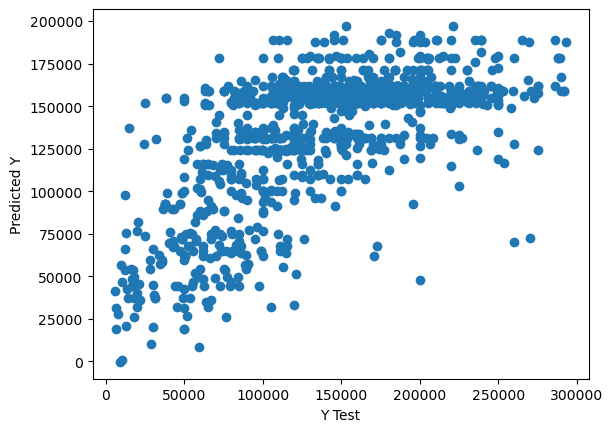

In [145]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

bruh

In [146]:
df

,salary_in_usd,EX,MI,SE,FL,FT,PT,2021,2022,2023,...,Applied Scientist,Data Analyst,Data Architect,Data Engineer,Data Science Manager,Data Scientist,Machine Learning Engineer,Other Job Title,Research Engineer,Research Scientist
0,85847,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,30000,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,25500,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,175000,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,120000,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3749,165000,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3751,151000,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3752,105000,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3753,100000,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [147]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [148]:
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("MAE:", mean_absolute_error(y_test, predictions))
print("Explained variance score:", explained_variance_score(y_test, predictions))

MSE: 2079341423.8545098
RMSE: 45599.79631373927
MAE: 35715.60681369566
Explained variance score: 0.4077207175449654


QUESTION: Should i sort the job_title based on the count or the salary_in_usd?